In [2]:
# Importing necessary packages
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data gathering

# Load the Iris dataset

In [3]:

iris = load_iris()
X = iris.data
y = iris.target

## Display pairplot for the Iris dataset

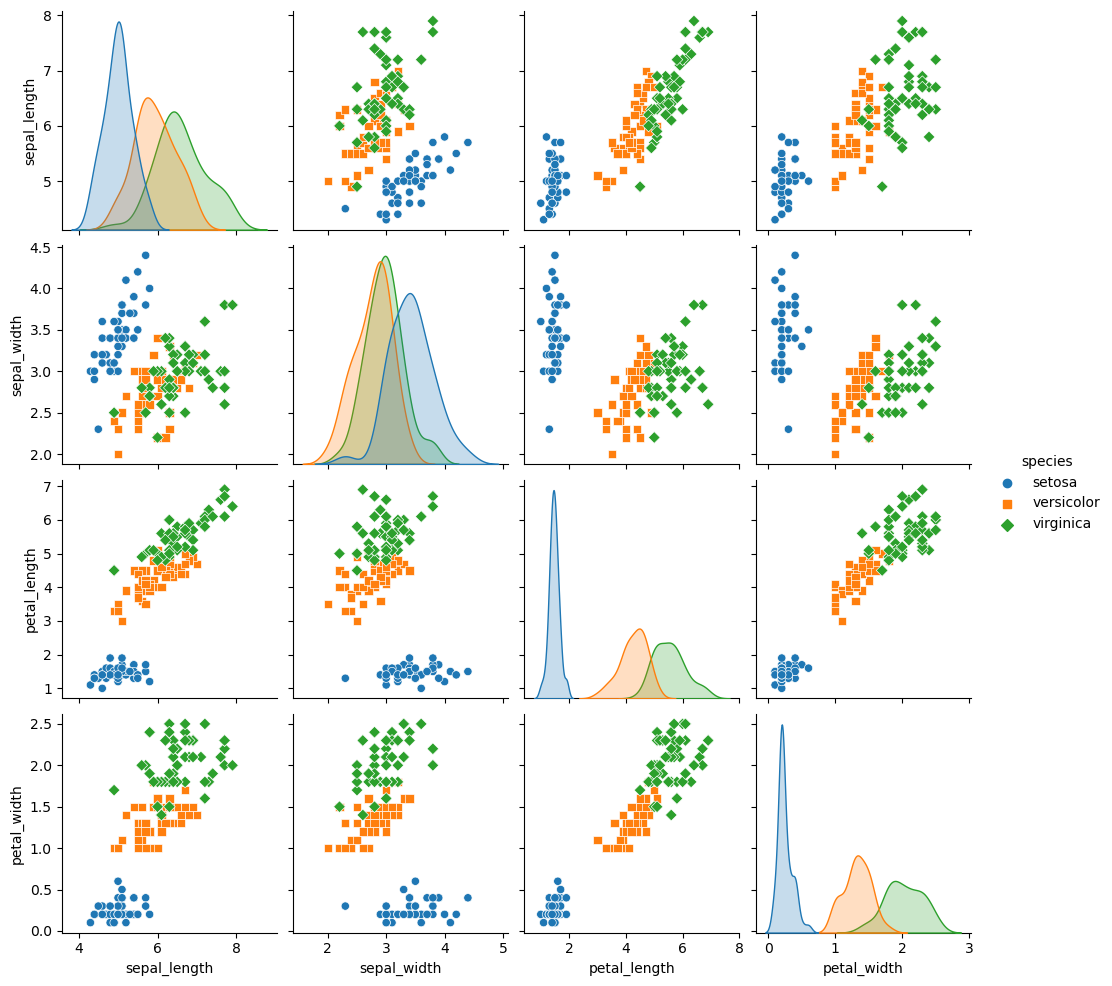

<Figure size 640x480 with 0 Axes>

In [11]:

sns.pairplot(sns.load_dataset('iris'), hue='species', markers=["o", "s", "D"])
plt.show()
plt.savefig("111")

## Split the data into training and testing sets

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train the Naive Bayes classifier

In [6]:

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = naive_bayes.predict(X_test)

## Evaluate the performance of the model

In [8]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Display classification report and confusion matrix

In [9]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




Confusion Matrix:


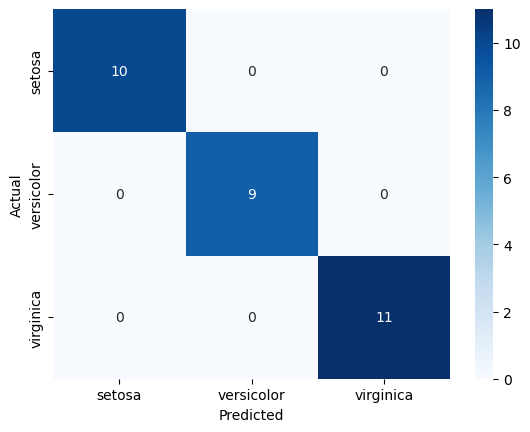

In [10]:
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

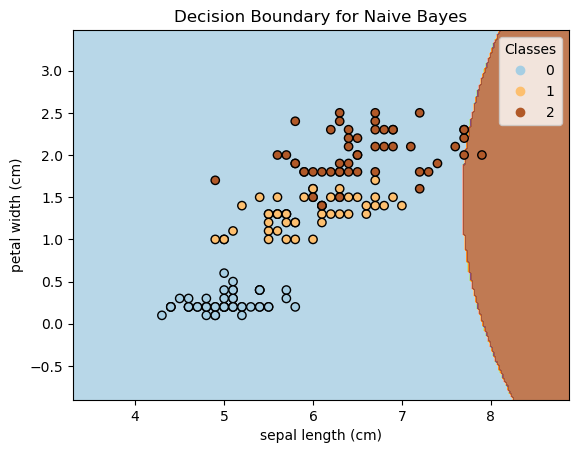

In [17]:
# Plot decision boundary for the Naive Bayes classifier
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Scatter plot of data points
    scatter = plt.scatter(X[:, 0], X[:, 3], c=y, edgecolors='k', cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[3])
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# Plot decision boundary for the Naive Bayes classifier
plot_decision_boundary(X, y, naive_bayes, "Decision Boundary for Naive Bayes")
